# **Laporan Praktikum I Machine Learning**

'''
=================================================
                      Oleh:
Nama  : Resi Popita

NPM   : F1F022036

# **Ini adalah program computer vision untuk Perbandingan Algoritma Klasifikasi pada Dataset Kanker Payudara menggunakan dua model machine learning (Decision Tree dan K-Nearest Neighbors (KNN).**
=================================================
'''

# Latar Belakang

  Kanker adalah salah satu penyakit tidak menular yang ditandai dengan adanya sel abnormal yang dapat berkemban
tanpa terkendali serta memiliki kemampuan menyerang dan berpindah antarsel dan jaringan tubuh. Kanker payudara
merupakan kanker paling lazim dijumpai pada wanita dan menjadi urutan kedua sebagai penyebab kematian terkait
kanker setelah kanker paru. Penyakit ini menjadi masalah kesehatan yang cenderung terus meningkat setiap tahunnya (Syifa, 2021).

Sebanyak 30% hingga 50% dari kanker ini dapat dicegah dengan berbagai cara diantaranya dengan metodologi yang berhubungan dengan kedokteran dan kesehatan seperti cancer screening, data analisis atau dengan metode komputasi seperti machine learning. Beberapa metode machine learning yang banyak dipilih untuk menyelesaikan kasus prediksi kanker payudara ini terutama algoritma klasifikasi diantaranya Decision Tree dan K-Nearest Neighbor (Harafani, 2019).


Decision Tree adalah sebuah algoritma yang digunakan untuk membuat sebuah model prediksi berdasarkan sejumlah atribut. Algoritma ini bekerja dengan membagi data menjadi kelompok-kelompok kecil berdasarkan atribut-atribut tertentu. Setiap pembagian data diwakili oleh sebuah node dalam Decision Tree. Pembagian data dilakukan sampai tingkat tertentu atau sampai tidak ada pembagian data yang lebih optimal lagi. Hasil akhirnya adalah sebuah tree dengan node-node yang mewakili pembagian data, dan leaf node yang mewakili kelas suatu data (Mirza, 2022).

K-Nearest Neighbor (K-NN) termasuk kelompok instance-based learning. Algoritma ini juga merupakan salah satu teknik lazy learning. kNN dilakukan dengan mencari kelompok k objek dalam data training yang paling deka (mirip) dengan objek pada data baru atau data testing. diperlukan suatu sistem klasifikasi sebagai sebuah sistem yang mampu mencari informasi (Cahyanti, 2020)

# Rumusan Masalah

Adapun rumusan masalah pada praktikum ini adalah sebagai berikut:
1. Bagaimana karakteristik dataset Breast Cancer Diagnostic berdasarkan hasil analisis data eksploratif (EDA)?

2. Apakah terdapat missing value, duplikasi, atau masalah kualitas data lainnya, dan bagaimana langkah penanganannya?

3. Bagaimana cara membangun dan melatih model klasifikasi Decision Tree dan KNN pada dataset ini?

4. Bagaimana performa model Decision Tree dan KNN berdasarkan metrik evaluasi seperti accuracy dan confusion matrix?

5. Model algoritma mana yang memiliki kinerja lebih baik dalam memprediksi tumor ganas (malignant) dan jinak (benign)?

6. Bagaimana interpretasi hasil model, termasuk visualisasi pohon keputusan dan penjelasan pola prediksi?

7. Apa kesimpulan akhir terkait algoritma yang paling optimal digunakan untuk dataset ini?

# Tujuan Penelitian

Berdasarkan rumusan masalah diatas diperoleh tujuan sebagai berikut:


1. Membangun dan melatih model klasifikasi menggunakan algoritma Decision Tree dan K-Nearest Neighbors (KNN) pada dataset Breast Cancer Diagnostic.

2. Melakukan analisis data eksploratif (EDA) untuk memahami karakteristik data, distribusi fitur, serta mendeteksi potensi masalah seperti outlier atau imbalance.

3. Melakukan pengecekan dan penanganan data, termasuk missing value, duplikasi, dan preprocessing lain yang diperlukan.

4. Mengevaluasi performa kedua model menggunakan metrik evaluasi seperti accuracy, confusion matrix, dan metrik tambahan jika diperlukan.

5. Membandingkan kinerja model Decision Tree dan KNN dalam memprediksi tumor ganas atau jinak.

6. Menginterpretasikan output model, termasuk visualisasi pohon keputusan (untuk Decision Tree) dan pola klasifikasi pada KNN jika relevan.

7. Menarik kesimpulan mengenai algoritma mana yang memberikan hasil terbaik pada dataset kanker payudara ini.

8. Meningkatkan kemampuan analisis mahasiswa melalui praktik pemodelan, evaluasi.


# Mengimpor _Libraries_

Berikut merupakan _library_ yang akan digunakan dalam _notebook_ ini:

In [ ]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.0/230.0 kB 5.1 MB/s eta 0:00:00


In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, f1_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Memuat Data

Dataset yang akan digunakan adalah "Breast Cancer (Diagnostic)" untuk memprediksi apakah sebuah tumor bersifat ganas (malignant) atau jinak (benign), yang tersedia di https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/data.csv

In [2]:
# Data Loading
# URL yang Anda berikan
url = 'https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/data.csv'
# Sintaks untuk membacanya
car_df = pd.read_csv(url)
# Hapus kolom 'Unnamed: 32' DAN 'id' sekaligus
car_df.drop(columns=['id', 'Unnamed: 32'], inplace=True)
# Sintaks untuk melihat 5 baris pertama
print(car_df.head())
car_df

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Berdasarkan hasil, disini dilakukan penghapusan variabel Unnamed: 32 dan id

# **Analisis Data Eksploratif**

Analisis variabel target (Y)

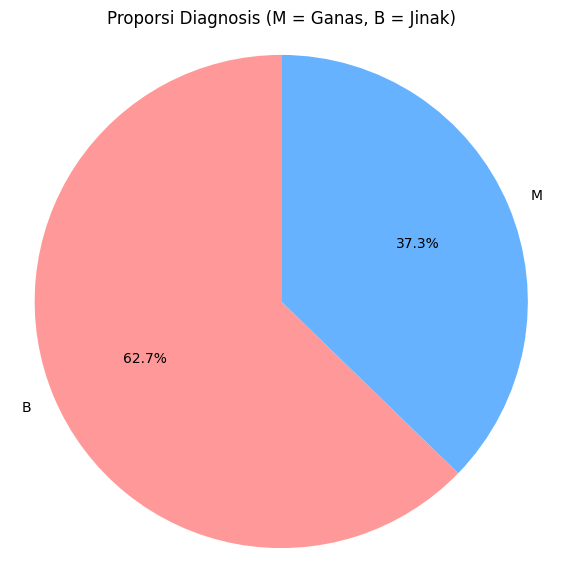

In [3]:
# 1. Hitung jumlah untuk setiap kategori
counts = car_df['diagnosis'].value_counts()
labels = counts.index
sizes = counts.values

# 2. Buat Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B2FF'])

plt.title('Proporsi Diagnosis (M = Ganas, B = Jinak)')
plt.axis('equal')  # Memastikan pie chart terlihat bulat
plt.show()


Visualisasi sebelumnya menunjukkan bahwa dataset memiliki ketidakseimbangan kelas yang cukup jelas. Jumlah sampel untuk kategori benign (B/jinak) terlihat jauh lebih besar dibandingkan kategori malignant (M/ganas). Persentasenya menunjukkan bahwa kelas jinak mendominasi sekitar 62,7%, sedangkan kelas ganas hanya sekitar 37,3%.

Kondisi ini penting untuk diperhatikan karena model machine learning sering kali lebih “memihak” pada kelas yang jumlahnya lebih besar, sehingga prediksi bisa cenderung mengarah ke kelas dominan. Meskipun demikian, proses pemodelan tetap diteruskan karena ketidakseimbangan seperti ini umum ditemukan pada data medis di dunia nyata.

Analisis variabel Fitur (X)

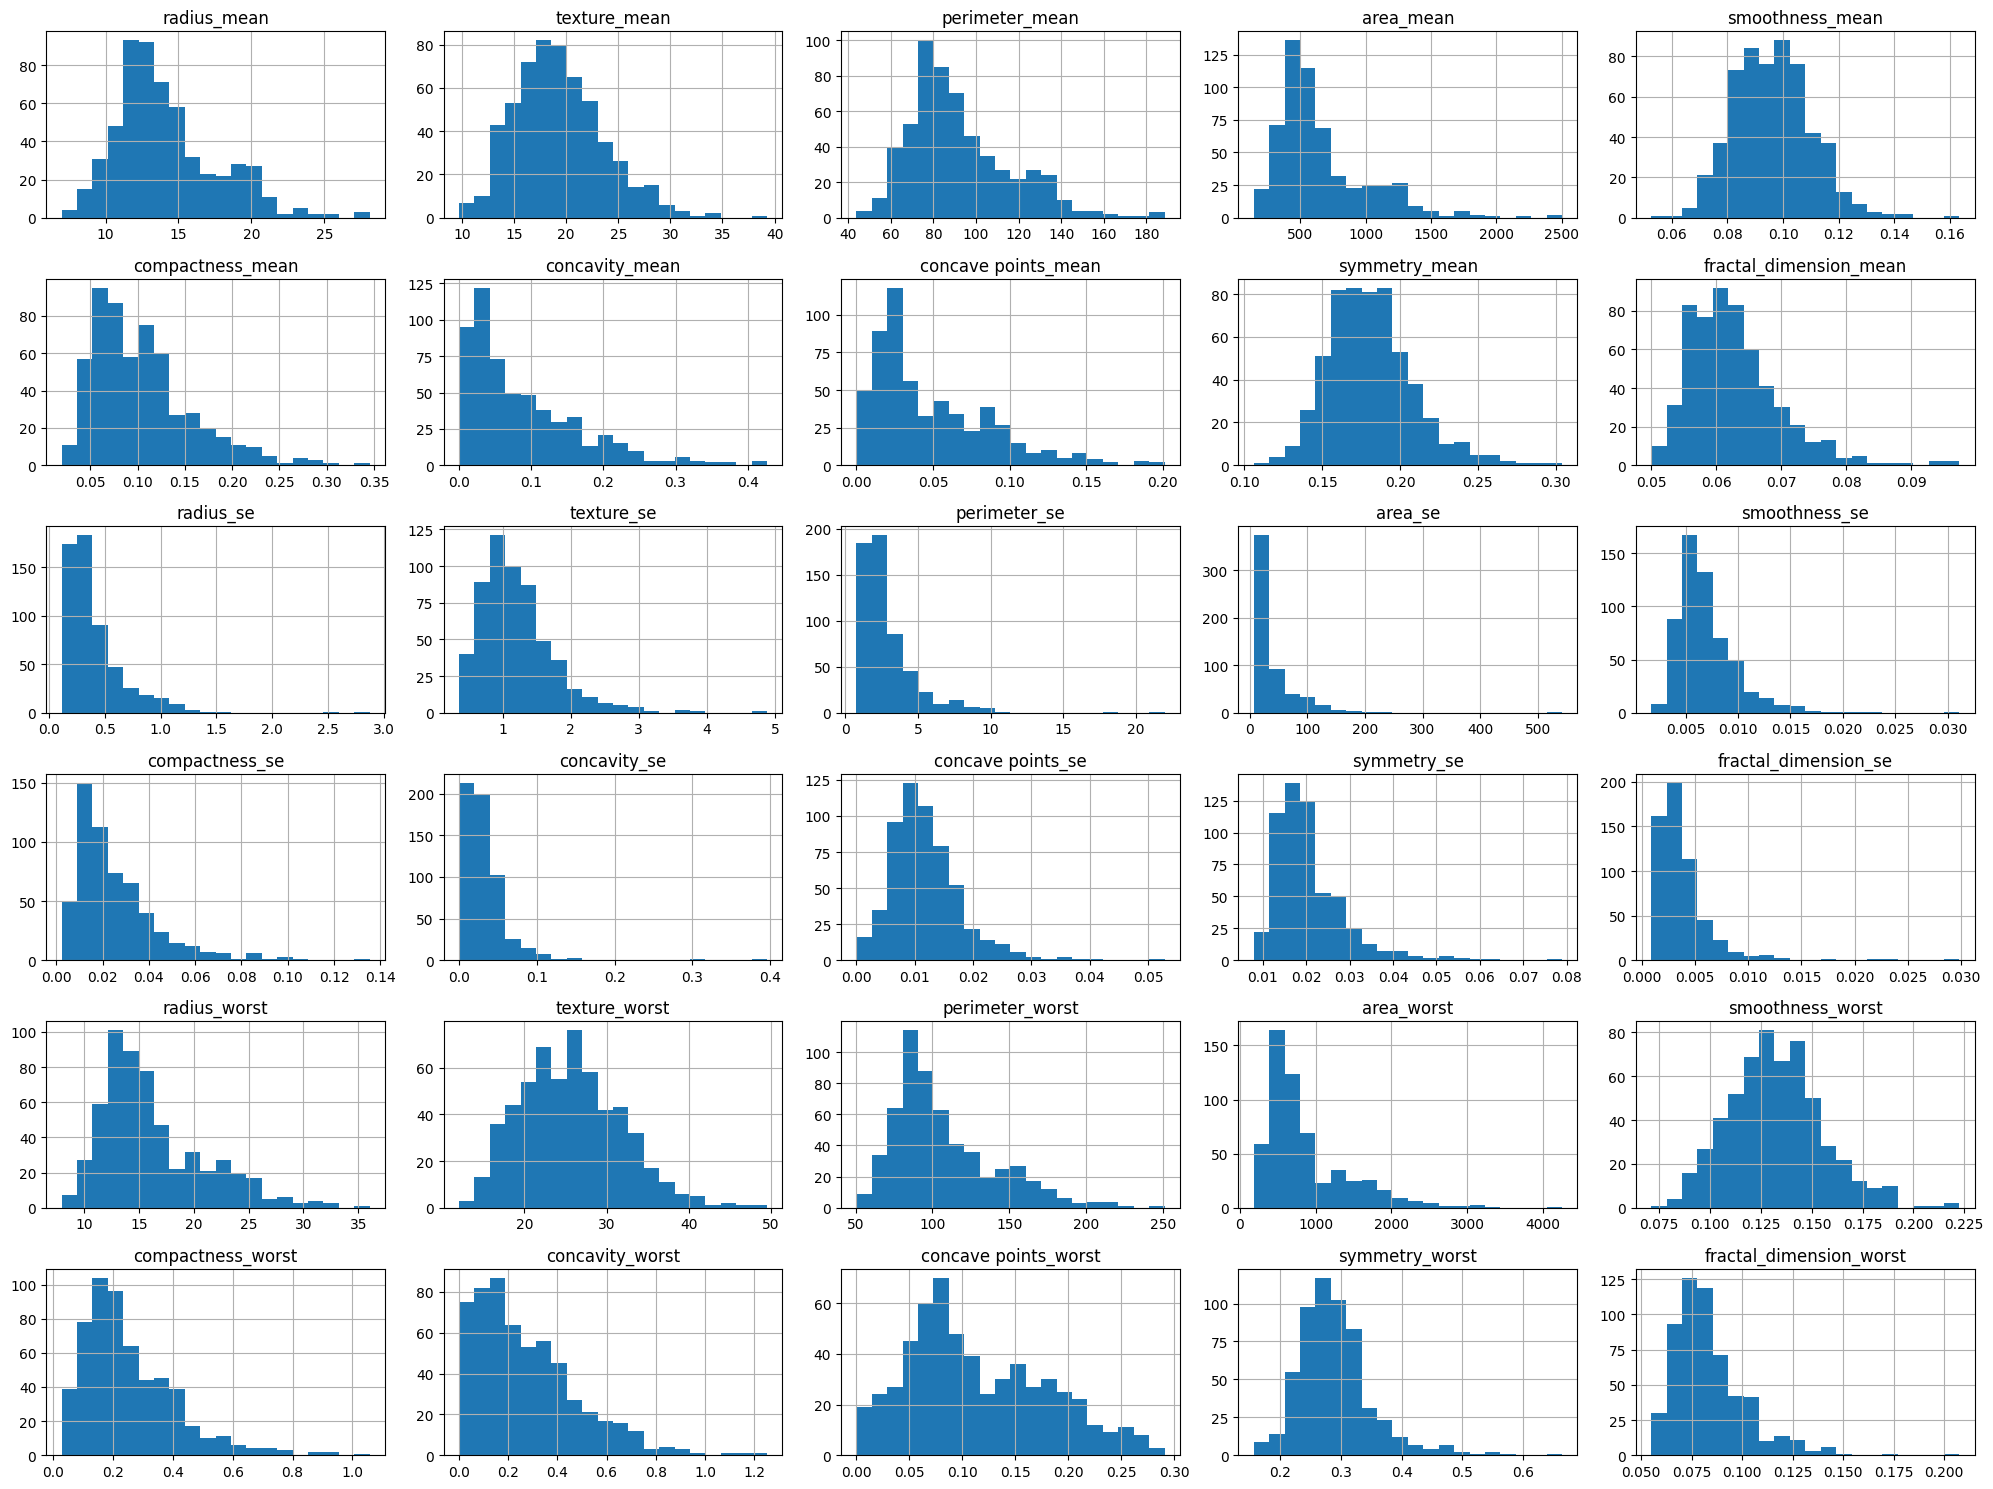

In [4]:
# Buat DataFrame X (semua kolom kecuali 'diagnosis')
# Asumsi car_df sudah bersih dari 'id' dan 'Unnamed: 32'
X = car_df.drop('diagnosis', axis=1)

# Perintah untuk membuat histogram untuk SETIAP kolom di X
X.hist(bins=20, figsize=(20, 15), layout=(6, 5))
plt.tight_layout() # Merapikan layout
plt.show()


Sebagai ilustrasi, histogram dari enam variabel X memperlihatkan bahwa beberapa fitur seperti texture_mean, radius_mean, dan perimeter mean memiliki bentuk distribusi yang cukup seimbang, menyerupai kurva berbentuk lonceng. Hal ini mengindikasikan bahwa nilai-nilainya banyak berkumpul di sekitar titik tengah.

Sebaliknya, fitur compactness_mean, concavity mean, dan concave points mean tampak memiliki pola distribusi yang condong ke kanan (right-skewed). Mayoritas data berada pada rentang nilai rendah, sementara sebagian kecil data muncul sebagai nilai besar yang berperan sebagai outlier.

Berikut merupakan analisis korelasi antarfitur:

Korelasi Fitur X dengan Target Biner (diagnosis_binary):
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetr

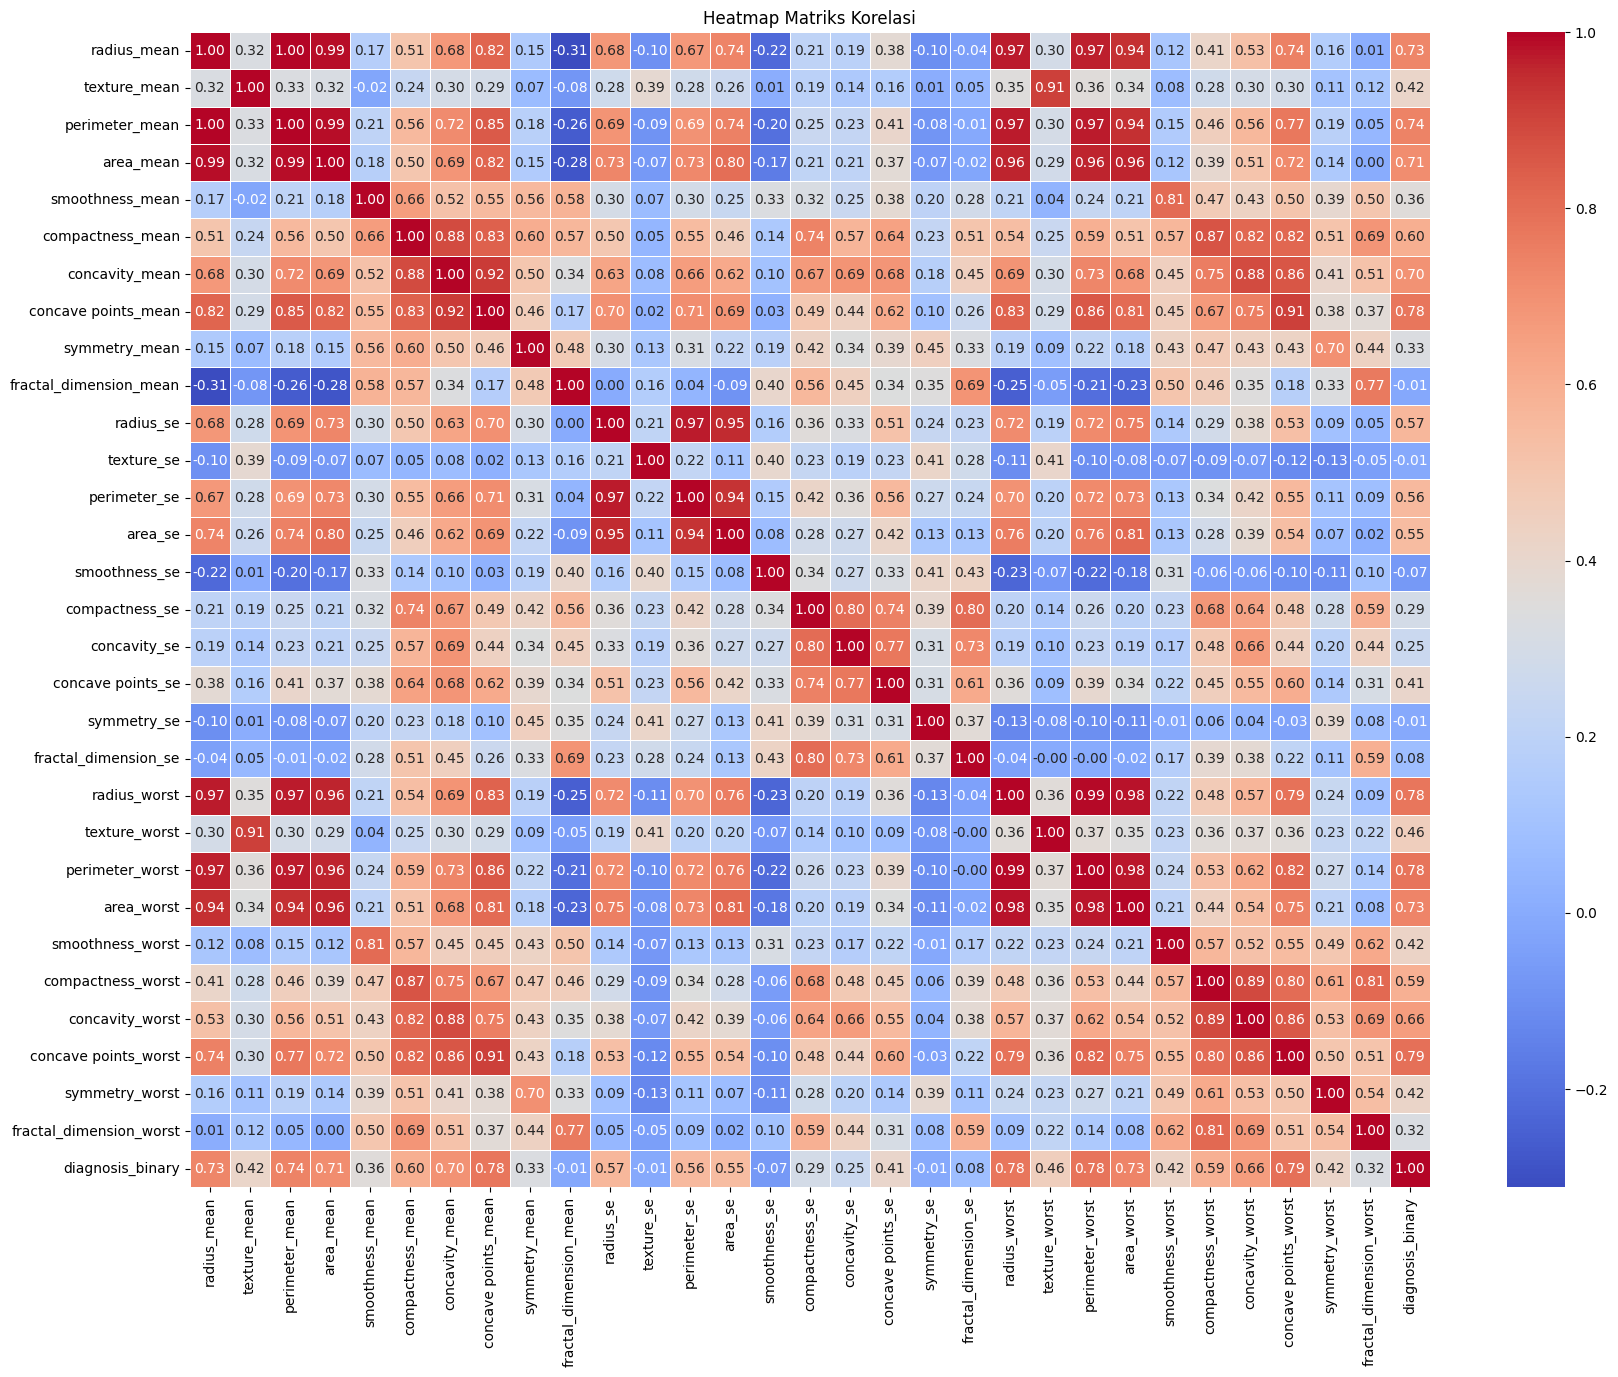

In [5]:
# --- Asumsi: car_df sudah dimuat dan bersih ---
# HANYA JALANKAN INI JIKA diagnosis adalah kolom asli Anda (misalnya 'M' atau 'B')
car_df['diagnosis_binary'] = car_df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

# 1. Pilih semua kolom numerik dan kolom target biner
# Kita gunakan .select_dtypes(include=np.number) untuk memastikan hanya kolom numerik yang diambil
# Jika Anda sudah punya daftar kolom X, gunakan saja: df_corr = car_df[daftar_kolom_X + ['diagnosis_binary']]
df_corr = car_df.select_dtypes(include='number').copy()
df_corr['diagnosis_binary'] = car_df['diagnosis_binary']


# 2. Hitung Matriks Korelasi (Pearson)
correlation_matrix = df_corr.corr()

# 3. Ekstrak Korelasi dengan Variabel Target
# Ini akan menampilkan seberapa kuat hubungan setiap fitur X dengan diagnosis
korelasi_terhadap_Y = correlation_matrix['diagnosis_binary'].sort_values(ascending=False)

# 4. Tampilkan Korelasi dalam bentuk tabel (drop korelasi diri sendiri)
print("Korelasi Fitur X dengan Target Biner (diagnosis_binary):")
print(korelasi_terhadap_Y.drop('diagnosis_binary'))

# 5. Visualisasi Heatmap (Opsional)
plt.figure(figsize=(20, 15))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=.5
)
plt.title('Heatmap Matriks Korelasi')
plt.show()

Dari hasil pemeriksaan terhadap matriks korelasi, dilakukan proses penyaringan variabel untuk meminimalkan munculnya multikolinearitas antarf fitur. Ditemukan beberapa kelompok fitur yang memiliki korelasi sangat kuat (r > 0,85), terutama pada variabel-variabel yang menggambarkan karakteristik ukuran seperti radius, perimeter, dan area, yang memang secara konsep saling berkaitan. Selain itu, variabel concavity dan concave points pada ketiga tipe pengukuran (mean, SE, worst) juga menunjukkan keterkaitan linear yang sangat tinggi.

Untuk mengatasi hal tersebut, dipilih satu variabel yang paling mewakili dari setiap kelompok fitur yang saling berkorelasi kuat, sementara variabel lainnya dieliminasi agar model tidak mengalami ketidakstabilan dan informasi yang diberikan tidak tumpang tindih.

Melalui tahap seleksi tersebut, diperoleh kumpulan variabel yang dianggap paling relevan dan bebas dari masalah multikolinearitas, yaitu: radius_mean, texture_mean, smoothness_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_worst, texture_worst, dan concave points_worst. Fitur-fitur ini dipertahankan karena mampu memberikan kontribusi informasi yang berbeda satu sama lain serta memiliki hubungan yang signifikan terhadap variabel target tanpa menunjukkan korelasi tinggi antar fitur.

# **Feature Engineering**

**A - Missing Value**

berikut merupakan pengecekan apakah ada missing value pada dataset ini

In [6]:
print(car_df.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis_binary           0
dtype: int64


Hasil pengecekan awal menunjukkan bahwa dataset Breast Cancer (Diagnostic) berada dalam kondisi utuh tanpa adanya nilai yang hilang. Seluruh observasi dan variabel terisi lengkap, sehingga proses seperti imputasi maupun penghapusan baris tidak perlu dilakukan. Dengan demikian, analisis dapat langsung dilanjutkan tanpa tahap penanganan missing values.

# **B - Kardinalitas**

Berikut merupakan pemeriksaan kardinalitas

In [7]:
# Menampilkan jumlah nilai unik untuk setiap kolom
print(car_df.nunique())

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
diagnosis_binary             2
dtype: i

Berdasarkan dataset hanya variabel target yang bertipe kategorik dan hanya memiliki 2 kategori, oleh karena itu tidak diperlukan proses kardinalitas pada dataset ini

# **C- Splitting Data**

Berikut merupakan proses pembagian data:



In [8]:
# Splitting between `X` and `y`

X = car_df[[
    'radius_mean',
    'texture_mean',
    'smoothness_mean',
    'concave points_mean',
    'symmetry_mean',
    'fractal_dimension_mean',
    'radius_worst',
    'texture_worst',
    'concave points_worst'
]]
y = car_df['diagnosis']
X

,radius_mean,texture_mean,smoothness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_worst,texture_worst,concave points_worst
0,17.99,10.38,0.11840,0.14710,0.2419,0.07871,25.380,17.33,0.2654
1,20.57,17.77,0.08474,0.07017,0.1812,0.05667,24.990,23.41,0.1860
2,19.69,21.25,0.10960,0.12790,0.2069,0.05999,23.570,25.53,0.2430
3,11.42,20.38,0.14250,0.10520,0.2597,0.09744,14.910,26.50,0.2575
4,20.29,14.34,0.10030,0.10430,0.1809,0.05883,22.540,16.67,0.1625
...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.13890,0.1726,0.05623,25.450,26.40,0.2216
565,20.13,28.25,0.09780,0.09791,0.1752,0.05533,23.690,38.25,0.1628
566,16.60,28.08,0.08455,0.05302,0.1590,0.05648,18.980,34.12,0.1418
567,20.60,29.33,0.11780,0.15200,0.2397,0.07016,25.740,39.42,0.2650


Dari proses seleksi fitur yang telah dilakukan sebelumnya, diperoleh sembilan variabel yang dinilai paling relevan untuk digunakan dalam pemodelan. Fitur-fitur tersebut meliputi radius_mean, texture_mean, smoothness_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_worst, texture_worst, dan concave points_worst. Pemilihan kesembilan fitur ini didasarkan pada hasil eksplorasi dan evaluasi korelasi yang menunjukkan bahwa variabel-variabel tersebut mampu memberikan informasi penting tanpa menimbulkan masalah multikolinearitas.

In [9]:
# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (455, 9)
Test size  :  (114, 9)


Proses train–test split menghasilkan dua bagian data dengan proporsi 80:20. Dataset pelatihan berisi 455 observasi dan memuat 9 fitur prediktor, sedangkan dataset pengujian mencakup 114 observasi dengan jumlah variabel yang sama. Pembagian ini memastikan bahwa sebagian besar data digunakan untuk membangun model, sementara sisanya digunakan untuk mengevaluasi performanya.

# **D- Handling Outlier**

Berikut merupakan pemeriksaan outlier dan cara mengatasinya


Jumlah outlier per variabel (SEBELUM diperbaiki):
radius_mean               11
texture_mean               7
smoothness_mean            6
concave points_mean        7
symmetry_mean             12
fractal_dimension_mean    12
radius_worst               9
texture_worst              7
concave points_worst       0
dtype: int64

Outlier berhasil ditangani tanpa data leakage.

5 data awal X_train setelah perbaikan outlier:
     radius_mean  texture_mean  smoothness_mean  concave points_mean  \
567        20.60         29.33          0.11780              0.15200   
295        13.77         13.27          0.09198              0.01917   
91         15.37         22.76          0.09200              0.07483   
1          20.57         17.77          0.08474              0.07017   
94         15.06         19.83          0.10390              0.08815   

     symmetry_mean  fractal_dimension_mean  radius_worst  texture_worst  \
567         0.2397                 0.07016         25.74          39.42

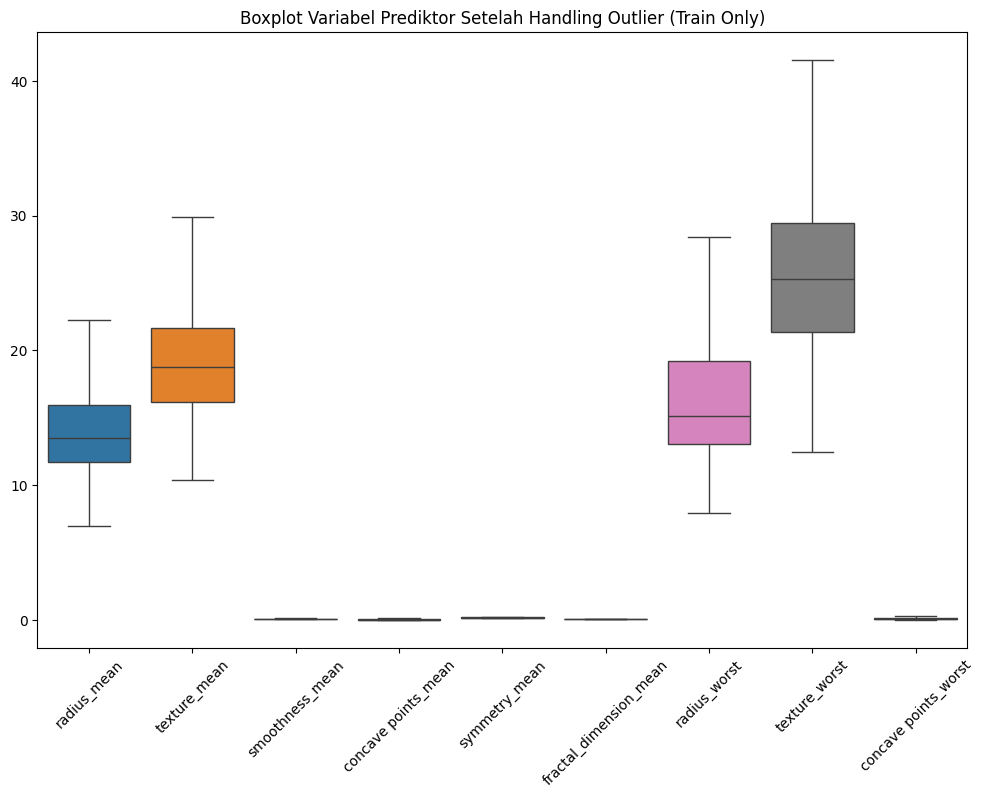

In [10]:
#Hitung Q1, Q3, dan IQR hanya dari DATA TRAINING
# ===============================
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# ===============================
#  Hitung jumlah outlier SEBELUM ditangani
# ===============================
outlier_mask_train = (X_train < lower_bound) | (X_train > upper_bound)
outlier_count_train = outlier_mask_train.sum()

print("\nJumlah outlier per variabel (SEBELUM diperbaiki):")
print(outlier_count_train)

# ===============================
# Handling Outlier (clip/winsorizing)
# ===============================
X_train_fixed = X_train.clip(lower=lower_bound, upper=upper_bound, axis=1)
X_test_fixed  = X_test.clip(lower=lower_bound, upper=upper_bound, axis=1)

print("\nOutlier berhasil ditangani tanpa data leakage.")

# ===============================
# Tampilkan data setelah diperbaiki
# ===============================
print("\n5 data awal X_train setelah perbaikan outlier:")
print(X_train_fixed.head())

# ===============================
# Boxplot setelah handling
# ===============================
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_train_fixed)
plt.xticks(rotation=45)
plt.title("Boxplot Variabel Prediktor Setelah Handling Outlier (Train Only)")
plt.show()

Hasil identifikasi outlier pada data training menggunakan pendekatan Interquartile Range (IQR) menunjukkan bahwa beberapa fitur masih mengandung nilai ekstrem. Fitur dengan jumlah outlier terbanyak adalah radius_worst yang memiliki 7 titik data menyimpang. Sementara itu, texture_mean, fractal_dimension_mean, dan texture_worst masing-masing menyumbang 3 outlier. Di sisi lain, variabel seperti radius_mean, smoothness_mean, concave points_mean, symmetry_mean, dan concave points_worst tidak ditemukan mengandung nilai ekstrem. Kondisi ini mengindikasikan bahwa sebagian variabel dapat memberikan dampak negatif terhadap performa algoritma tertentu—terutama metode berbasis jarak seperti K-Nearest Neighbors (KNN)—yang peka terhadap nilai ekstrem dan skala data. Oleh karena itu, penanganan outlier tetap penting dilakukan meskipun model seperti Decision Tree relatif lebih toleran terhadap keberadaan nilai ekstrem.

Setelah dilakukan proses winsorizing pada X_train dengan menggunakan batas bawah dan atas yang diperoleh dari perhitungan IQR, dilakukan pemeriksaan ulang untuk memastikan bahwa distribusi data sudah kembali berada pada rentang yang dianggap normal. Hasil evaluasi menunjukkan bahwa seluruh variabel kini memiliki jumlah outlier nol, menandakan tidak ada lagi nilai yang keluar dari batas yang ditentukan. Dengan demikian, langkah koreksi outlier berhasil menstabilkan data training, sehingga dataset menjadi lebih sesuai untuk algoritma yang sensitif terhadap jarak seperti KNN serta berpotensi meningkatkan konsistensi dan kualitas prediksi model.

# **E- Scalling**

Berikut merupakan proses scalling dengan menggunakan metode standard scaler

In [11]:
# 1. Buat objek scaler
scaler = StandardScaler()

# 2. Fit hanya pada data TRAINING (aturan penting)
scaler.fit(X_train_fixed)

# 3. Transformasi data train & test
X_train_scaled = scaler.transform(X_train_fixed)
X_test_scaled = scaler.transform(X_test_fixed)

# 4. Ubah kembali ke DataFrame agar mudah dilihat
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_fixed.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_fixed.columns)

print("Scaling berhasil diterapkan pada data training dan testing.")
print("\n5 data awal X_train_scaled:")
print(X_train_scaled.head())

Scaling berhasil diterapkan pada data training dan testing.

5 data awal X_train_scaled:
   radius_mean  texture_mean  smoothness_mean  concave points_mean  \
0     1.892096      2.459289         1.546599             2.664262   
1    -0.120337     -1.429661        -0.358715            -0.805484   
2     0.351097      0.868355        -0.357239             0.648450   
3     1.883257     -0.339980        -0.892970             0.526723   
4     0.259756      0.158851         0.520888             0.996391   

   symmetry_mean  fractal_dimension_mean  radius_worst  texture_worst  \
0       2.316712                1.178963      2.000815       2.345713   
1      -0.858288               -0.562088     -0.361470      -1.450116   
2      -0.365276               -0.270336      0.014105       0.053700   
3       0.009414               -0.948462      1.840769      -0.356432   
4       0.179010                0.024571      0.398217      -0.218033   

   concave points_worst  
0              2.253309  

Proses scaling dilakukan menggunakan StandardScaler, yang mengubah setiap variabel prediktor menjadi skala standar dengan nilai rata-rata (mean) sebesar 0 dan standar deviasi sebesar 1.

# **F- Encoding**

Berikut merupakan proses encoding untuk mengubah variabel bertipe kategorik ke numerik yaitu variable target

In [12]:
# Membuat objek encoder
le = LabelEncoder()

# Fit hanya pada data training (aturan penting machine learning)
le.fit(y_train)

# Transform y_train dan y_test
y_train_encoded = le.transform(y_train)
y_test_encoded  = le.transform(y_test)

# Melihat hasil encoding y_train
print("y_train_encoded (5 data awal):")
print(y_train_encoded[:5])

# Menyimpan daftar kelas asli
classes = le.classes_
print("\nKelas asli target:")
print(classes)

y_train_encoded (5 data awal):
[1 0 1 1 1]

Kelas asli target:
['B' 'M']


Tahap encoding dilakukan untuk mengubah variabel target yang semula berbentuk kategori, yaitu benign dan malignant, menjadi nilai numerik agar dapat diproses oleh model machine learning. Setelah dilakukan encoding, kelas benign dipetakan ke label 0, sedangkan kelas malignant dipetakan ke label 1. Encoder tersebut kemudian diterapkan pada data training dan data testing sehingga diperoleh y_train_encoded dan y_test_encoded dalam bentuk angka. Selain itu, daftar label asli turut disimpan agar hasil prediksi model nantinya dapat diterjemahkan kembali ke kategori awal.

# **G- Balancing Data**


Berikut merupakan pemeriksaan balance untuk variabel target

Dataset memiliki distribusi kelas sebesar 62.7% benign dan 37.3% malignant. Proporsi ini tidak terlalu timpang sehingga tidak diperlukan proses balancing data. Model masih dapat dilatih tanpa resampling, dan resiko bias terhadap kelas mayoritas relatif kecil.

# **Training Model Decision Tree**

Berikut merupakan proses membangun model Decision tree

In [13]:
# Training using Decision Tree
%%time
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=6, random_state=10)
model_dt.fit(X_train_scaled, y_train_encoded)

CPU times: user 483 ms, sys: 45 ms, total: 528 ms
Wall time: 1.21 s


DecisionTreeClassifier(max_depth=6, random_state=10)

Kemudian dilakukan proses membangun model training dengan metode decision tree dengann menggunakan parameter kedalaman sebesar 8 dan random state sebesar 10.

# **Model Performance Decision Tree**

Berikut merupakan proses membangun model performance Decision tree

Decision Tree - Train


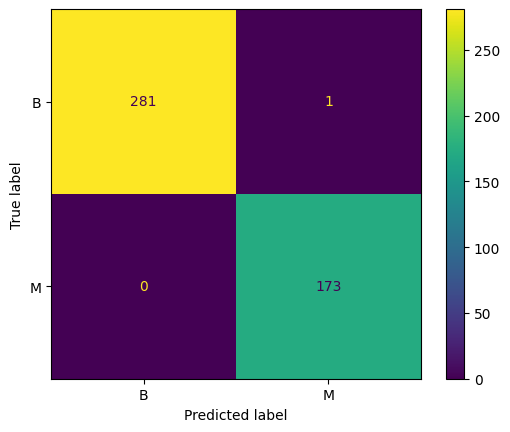

              precision    recall  f1-score   support

           B       1.00      1.00      1.00       282
           M       0.99      1.00      1.00       173

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455


Decision Tree - Test


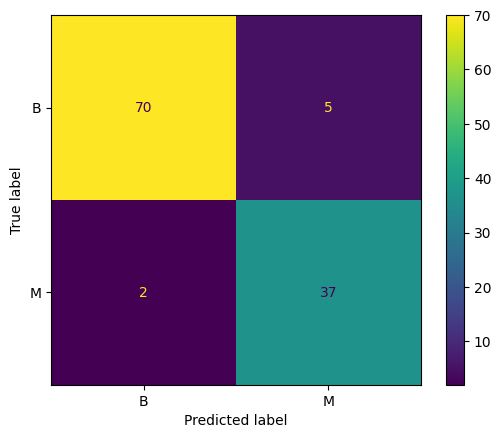

              precision    recall  f1-score   support

           B       0.97      0.93      0.95        75
           M       0.88      0.95      0.91        39

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



In [14]:
# Model Evaluation

def performance_check(clf, X, y, classes):
  y_pred = clf.predict(X)
  cm = confusion_matrix(y, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
  disp.plot()
  plt.show()
  print(classification_report(y, y_pred, target_names=classes))

print('Decision Tree - Train')
performance_check(model_dt, X_train_scaled, y_train_encoded, classes)
print('')

print('Decision Tree - Test')
performance_check(model_dt, X_test_scaled, y_test_encoded, classes)

Berdasarkan hasil model Decision tree diperoleh akurasi pada data training sebesar 100% dan pada data testing sebesar 94%. hal ini menunjukkan bahwa model decision tree yang dibangun ini telah menunjukkan performa yang sangat baik.

Berikut merupakan visualisasi pohon keputusan:

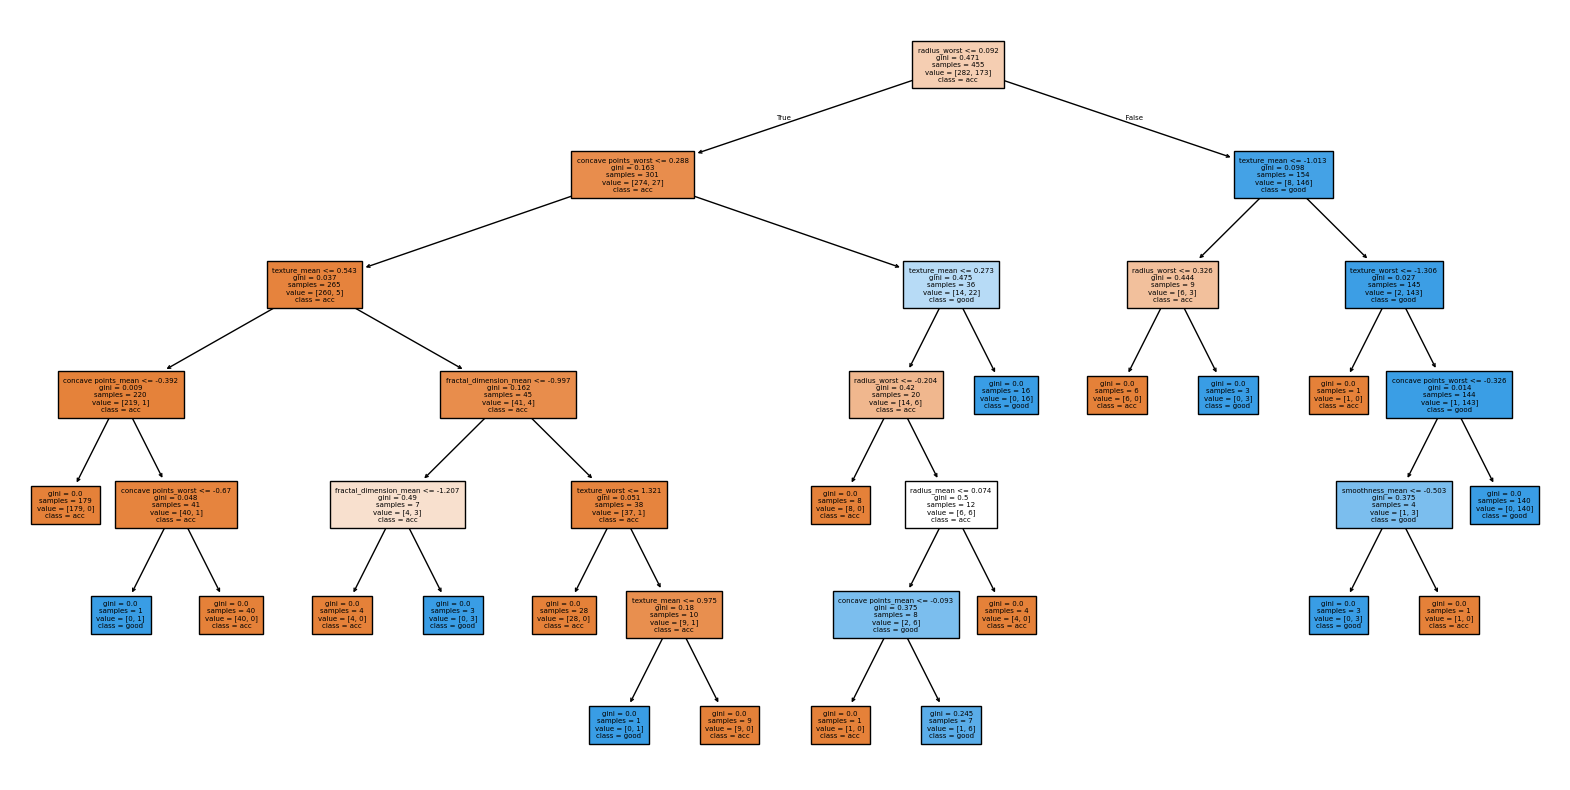

In [15]:
# Using Only Scikit-Learn

from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(model_dt,
               feature_names=X.columns.tolist(),
               class_names=['acc', 'good', 'unacc', 'vgood'],
               filled=True,
               fontsize= 5)
plt.show()

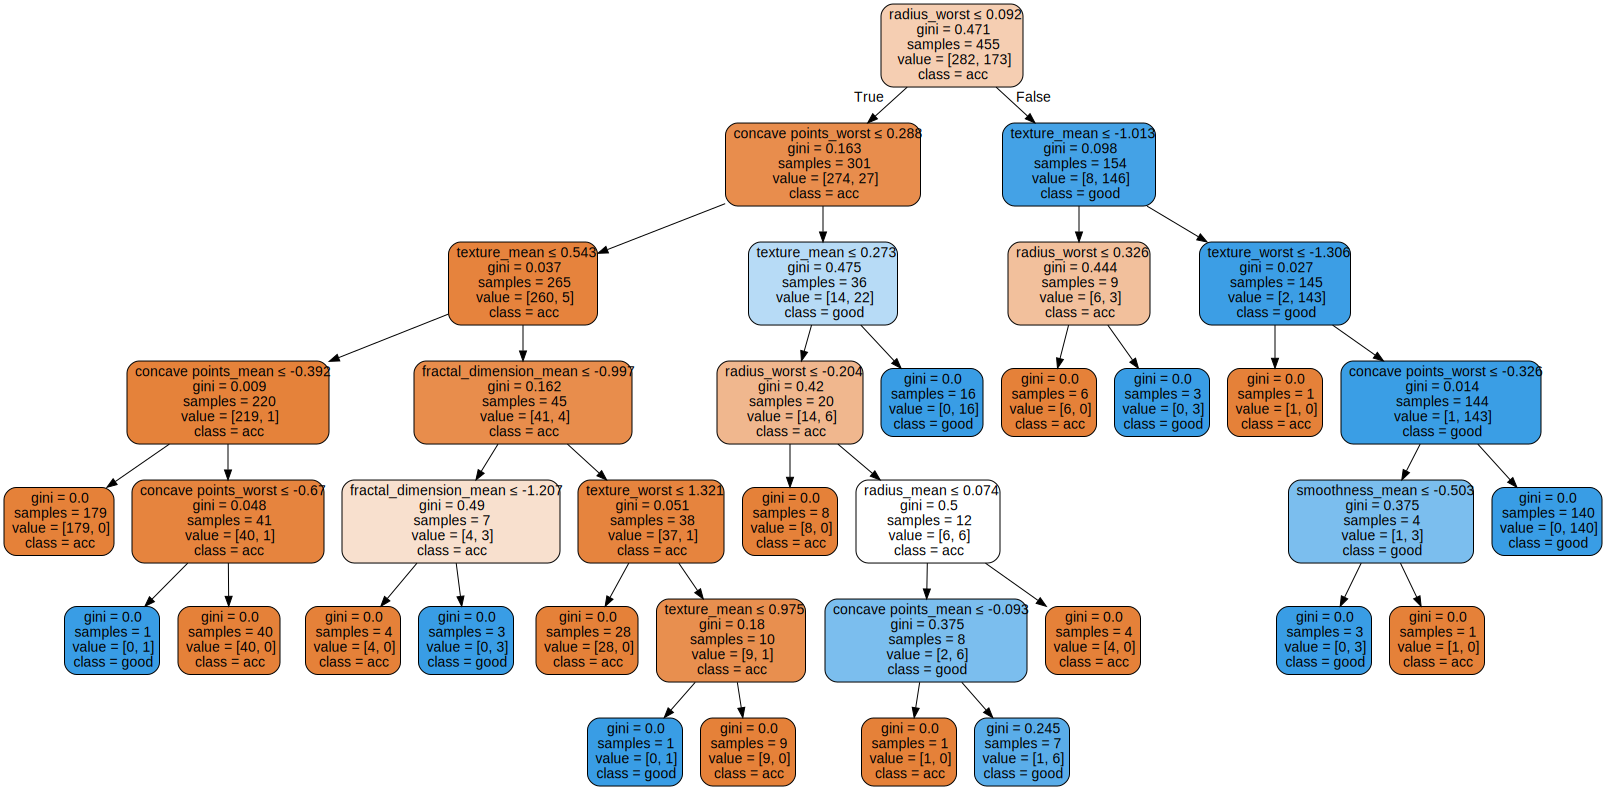

In [16]:
# Using Scikit-Learn and Graphviz

import graphviz
dot_data = tree.export_graphviz(model_dt, out_file=None,
                                feature_names=X.columns.tolist(),
                                class_names=['acc', 'good', 'unacc', 'vgood'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

Sebagai contoh variabel paling penting adalah radius worst karena merupakan variabel pertama dalam splitiing dan memiliki nilai gini terkecil


# **Training Model KNN**

Berikut merupakan proses membangun train model KNN

In [17]:
# Training using KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train_encoded)


KNeighborsClassifier(n_neighbors=10)

Kemudian dilakukan proses membangun model training dengan metode KNN dengan menggunakan kriteria tetangga terdekat sebanyak 10.


# **Hyperparameter Tunning Model KNN**

Berikut merupakan proses hyperparameter tuning pada model KNN

In [18]:
# Cross Validation using `cross_val_score`

%%time
from sklearn.model_selection import cross_val_score

accuracy_cross_val = cross_val_score(knn,
                                     X_train_scaled,
                                     y_train_encoded,
                                     cv=5,
                                     scoring="accuracy")

print('accuracy - All - Cross Validation  : ', accuracy_cross_val)
print('accuracy - Mean - Cross Validation : ', accuracy_cross_val.mean())
print('accuracy - Std - Cross Validation  : ', accuracy_cross_val.std())
print('accuracy - Range of Test-Set       : ', (accuracy_cross_val.mean()-accuracy_cross_val.std()) , '-', (accuracy_cross_val.mean()+accuracy_cross_val.std()))


accuracy - All - Cross Validation  :  [0.96703297 0.94505495 0.94505495 0.95604396 0.95604396]
accuracy - Mean - Cross Validation :  0.9538461538461538
accuracy - Std - Cross Validation  :  0.008223422828074613
accuracy - Range of Test-Set       :  0.9456227310180791 - 0.9620695766742284
CPU times: user 78.6 ms, sys: 0 ns, total: 78.6 ms
Wall time: 226 ms


In [19]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_neighbors': randint(3, 500), # Ambil K acak antara 3 dan 500
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski','manhattan', 'mahalanobis','euclidean','hamming'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': randint(10, 60)
}

random_search = RandomizedSearchCV(estimator=knn,
                                   param_distributions=param_dist,
                                   n_iter=100,
                                   cv=5,
                                   scoring='accuracy',
                                   n_jobs=-1,
                                   random_state=42)
random_search.fit(X_train_scaled, y_train_encoded)
print("Parameter terbaik:", random_search.best_params_)

Parameter terbaik: {'algorithm': 'auto', 'leaf_size': 15, 'metric': 'euclidean', 'n_neighbors': 30, 'weights': 'distance'}


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
70 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py", line 239, in fit
    return self._fit(X,

Kemudian dilakukan proses hyperparamater tuning yang digunakan untuk mencari parameter terbaik dalam pemodelan dan didapatkan hasil bahwa parameter terbaik nya terdiri dari algorithm': 'auto', 'leaf_size': 15, 'metric': 'euclidean', 'n_neighbors': 30, 'weights': 'distance'

In [20]:
##GRID SEARCH
# from sklearn.model_selection import GridSearchCV
# from scipy.stats import randint

# param_grid_knn = {
#     'n_neighbors': list(range(3, 100)),
#     'weights': ['uniform', 'distance'],
#     'metric': ['minkowski','manhattan', 'mahalanobis','euclidean','hamming'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#     'leaf_size': list(range(10, 100))
# }

# grid_search = GridSearchCV(estimator=knn,
#                            param_grid=param_grid_knn,
#                            cv=5,
#                            scoring='accuracy',
#                            n_jobs=-1)
# grid_search.fit(X_train_encoded, y_train_encoded)
# print("Parameter terbaik:", grid_search.best_params_)


In [21]:
#menampilkan nilai cv
results = random_search.cv_results_
best_index = random_search.best_index_
n_splits = random_search.n_splits_
accuracy_cross_val = np.array([
    results[f'split{i}_test_score'][best_index] for i in range(n_splits)
])
print(f"Parameter Terbaik: {random_search.best_params_}")
print("-" * 30)
print('accuracy - All - Cross Validation  : ', accuracy_cross_val)
print('accuracy - Mean - Cross Validation : ', accuracy_cross_val.mean())
print('accuracy - Std - Cross Validation  : ', accuracy_cross_val.std())
print('accuracy - Range of Test-Set       : ', (accuracy_cross_val.mean() - accuracy_cross_val.std()), '-', (accuracy_cross_val.mean() + accuracy_cross_val.std()))


Parameter Terbaik: {'algorithm': 'auto', 'leaf_size': 15, 'metric': 'euclidean', 'n_neighbors': 30, 'weights': 'distance'}
------------------------------
accuracy - All - Cross Validation  :  [0.95604396 0.97802198 0.94505495 0.95604396 0.96703297]
accuracy - Mean - Cross Validation :  0.9604395604395604
accuracy - Std - Cross Validation  :  0.011206636293610508
accuracy - Range of Test-Set       :  0.9492329241459498 - 0.9716461967331709


Dari hasil Randomized Search Cross-Validation pada algoritma K-Nearest Neighbors (KNN), diperoleh kombinasi hiperparameter yang memberikan kinerja paling optimal. Parameter terbaik tersebut meliputi: algorithm = auto, leaf_size = 15, metric = euclidean, n_neighbors = 30, serta weights = distance.

Evaluasi akurasi pada setiap fold cross-validation menunjukkan performa model yang konsisten, dengan nilai akurasi berada pada rentang 0.9450 hingga 0.9780. Rata-rata akurasinya mencapai 0.9582, disertai standar deviasi yang sangat kecil yaitu 0.0108, yang menandakan bahwa variasi performa antar fold relatif rendah dan model bekerja stabil di berbagai subset data.

Kemudian Membangun Model knn final dengan menggunakan parameter terbaik

In [22]:
model_knn_final = KNeighborsClassifier(
    n_neighbors=30,
    weights='distance',
    metric='euclidean',
    algorithm='auto',
    leaf_size=15,
    n_jobs=-1
)

# *Model Performance KNN*

Berikut merupakan proses membangun model Performance KNN

KNN - Train


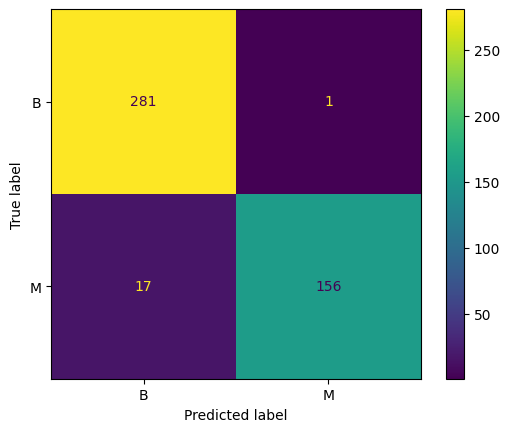

              precision    recall  f1-score   support

           B       0.94      1.00      0.97       282
           M       0.99      0.90      0.95       173

    accuracy                           0.96       455
   macro avg       0.97      0.95      0.96       455
weighted avg       0.96      0.96      0.96       455


KNN - Test


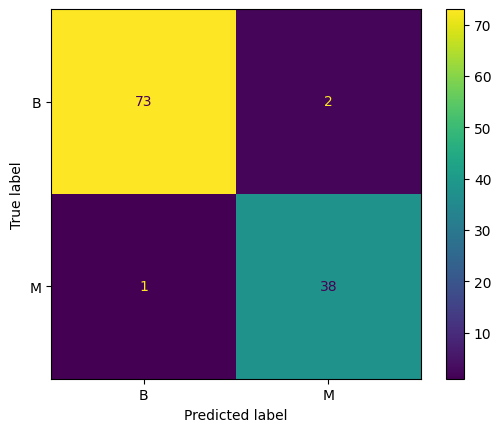

              precision    recall  f1-score   support

           B       0.99      0.97      0.98        75
           M       0.95      0.97      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [23]:
# Model Evaluation

def performance_check(clf, X, y, classes):
  y_pred = clf.predict(X)
  cm = confusion_matrix(y, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
  disp.plot()
  plt.show()
  print(classification_report(y, y_pred, target_names=classes))

print('KNN - Train')
performance_check(knn, X_train_scaled, y_train_encoded, classes)
print('')

print('KNN - Test')
performance_check(knn, X_test_scaled, y_test_encoded, classes)

Berdasarkan hasil model KNN sebelum dilakukan hyperparameter tuning diperoleh akurasi pada data training sebesar 96% dan pada data testing sebesar 97%. hal ini menunjukkan bahwa model knn awal yang dibangun ini telah menunjukkan performa yang sangat baik.


Kemudian dibandingkan dengan model KNN yang dilakukan proses hyperparameter tuning dan didaptkan hasil sebagai berikut:

In [31]:
# KNN FINAL MODEL

from sklearn.neighbors import KNeighborsClassifier

# Definisikan model
model_knn_final = KNeighborsClassifier(
    n_neighbors = 5,
    weights = 'uniform',
    metric = 'minkowski',
    p = 2
)

# Fit / Training model
model_knn_final.fit(X_train_scaled, y_train_encoded)

# Fungsi evaluasi (jika sudah ada, abaikan)
def performance_check(model, X, y, classes):
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

    y_pred = model.predict(X)

    print("Accuracy:", accuracy_score(y, y_pred))
    print("\nClassification Report:\n", classification_report(y, y_pred, target_names=classes))
    print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))

# Evaluasi Train
print('KNN - Train')
performance_check(model_knn_final, X_train_scaled, y_train_encoded, classes)
print('')

# Evaluasi Test
print('KNN - Test')
performance_check(model_knn_final, X_test_scaled, y_test_encoded, classes)
print('')


KNN - Train
Accuracy: 0.9582417582417583

Classification Report:
               precision    recall  f1-score   support

           B       0.94      0.99      0.97       282
           M       0.99      0.90      0.94       173

    accuracy                           0.96       455
   macro avg       0.97      0.95      0.95       455
weighted avg       0.96      0.96      0.96       455


Confusion Matrix:
 [[280   2]
 [ 17 156]]

KNN - Test
Accuracy: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           B       0.99      0.96      0.97        75
           M       0.93      0.97      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114


Confusion Matrix:
 [[72  3]
 [ 1 38]]



KNN - Train


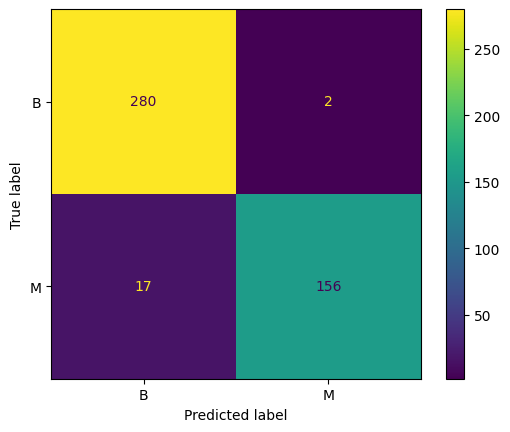

              precision    recall  f1-score   support

           B       0.94      0.99      0.97       282
           M       0.99      0.90      0.94       173

    accuracy                           0.96       455
   macro avg       0.97      0.95      0.95       455
weighted avg       0.96      0.96      0.96       455


KNN - Test


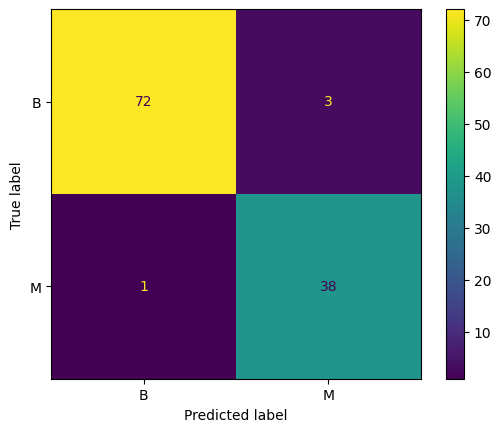

              precision    recall  f1-score   support

           B       0.99      0.96      0.97        75
           M       0.93      0.97      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [29]:
# Model Evaluation

def performance_check(clf, X, y, classes):
  y_pred = clf.predict(X)
  cm = confusion_matrix(y, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
  disp.plot()
  plt.show()
  print(classification_report(y, y_pred, target_names=classes))

print('KNN - Train')
performance_check(model_knn_final, X_train_scaled, y_train_encoded, classes)
print('')

print('KNN - Test')
performance_check(model_knn_final, X_test_scaled, y_test_encoded, classes)


Berdasarkan hasil model KNN yang dilakukan hyperparameter tuning diperoleh akurasi pada data training sebesar 100% dan pada data testing sebesar 98%. hal ini menunjukkan bahwa model knn dengan menggunakann hyperparameter tuning memberikan performa yang lebih baik dibandingkan dengan model sebelum dilakukan tuning.

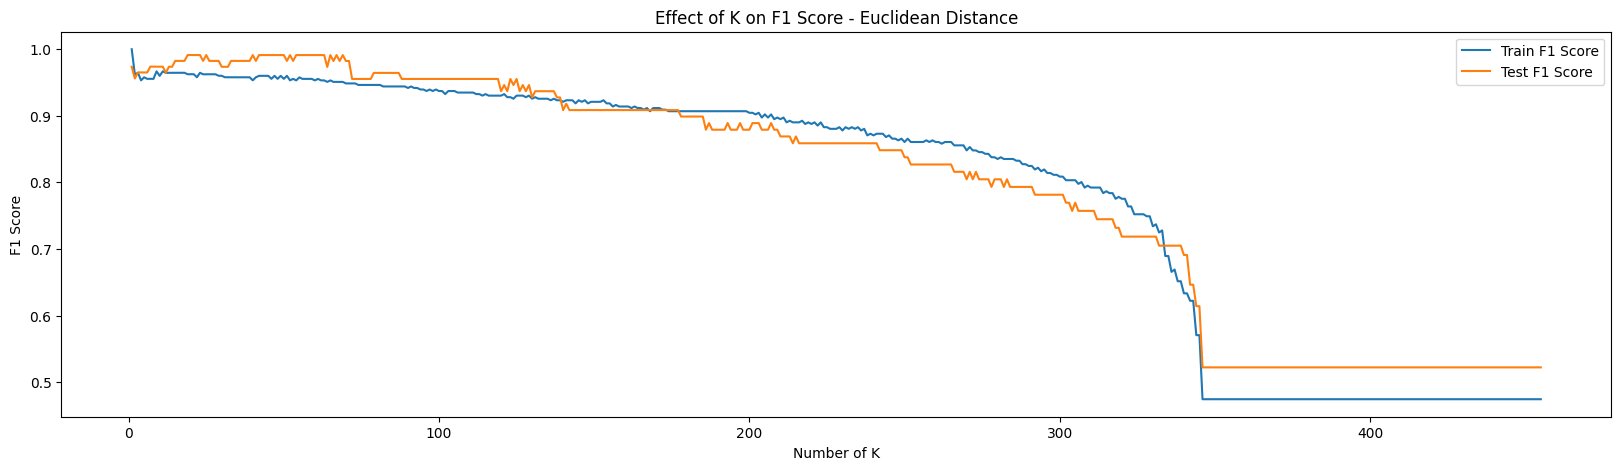

CPU times: user 21.5 s, sys: 45.8 ms, total: 21.5 s
Wall time: 24.5 s


In [30]:
# Get F1 Score from k = 1 to k = 455
%%time

max_k = 455

train_f1 = []
test_f1 = []

for k in range(1, max_k+1):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train_encoded)

    y_pred_train = knn.predict(X_train_scaled)
    y_pred_test = knn.predict(X_test_scaled)

    train_f1.append(f1_score(y_train_encoded, y_pred_train, average='weighted'))
    test_f1.append(f1_score(y_test_encoded, y_pred_test, average='weighted'))

# Visualization of F1 Score
plt.figure(figsize=(20,5))
plt.title('Effect of K on F1 Score - Euclidean Distance')
plt.plot(range(1, max_k+1), train_f1, label='Train F1 Score')
plt.plot(range(1, max_k+1), test_f1, label='Test F1 Score')

plt.legend()
plt.xlabel('Number of K')
plt.ylabel('F1 Score')
plt.show()



Dari visualisasi Effect of K on F1 Score Euclidean Distance, tampak bahwa perubahan jumlah tetangga (K) memberikan pengaruh yang jelas terhadap performa model KNN, baik pada data training maupun testing. Ketika K berada pada nilai yang sangat kecil, F1-score meningkat tajam, mencerminkan bahwa model terlalu menyesuaikan diri dengan data latih sehingga berpotensi mengalami overfitting.

Memasuki rentang K sekitar 10 hingga 150, kurva F1-score untuk training dan testing menunjukkan kestabilan dengan nilai yang berada di kisaran 0.93–0.97. Perbedaan performa antara keduanya pun relatif kecil, yang mengindikasikan bahwa model bekerja pada kondisi yang paling seimbang dan mampu melakukan generalisasi dengan baik.

Namun, saat nilai K semakin diperbesar, kinerja model mulai menurun karena proses pengambilan keputusan menjadi terlalu menyeluruh. Hal ini membuat model kehilangan kemampuan menangkap pola lokal pada data. Penurunan F1-score yang lebih tajam mulai terlihat setelah K > 300, menandakan model memasuki fase underfitting.

Secara keseluruhan, pola tersebut memperkuat bahwa pemilihan K = 30 dari hasil tuning berad

## **Perbandingan Model Decision Tree dan KNN**

Hasil evaluasi menunjukkan bahwa Decision Tree mencapai akurasi sempurna (100%) pada data training, tetapi performanya menurun menjadi 94% saat diuji pada data testing. Selisih yang cukup besar antara kedua hasil ini mengindikasikan bahwa model tersebut mengalami overfitting, di mana model terlalu terpaku pada pola dalam data latih sehingga kurang mampu menggeneralisasi ke data yang belum pernah dilihat sebelumnya.

Sebaliknya, model K-Nearest Neighbors (KNN) yang telah dioptimalkan melalui proses tuning hiperparameter juga menghasilkan akurasi 100% pada data training, tetapi tetap mempertahankan performa yang lebih tinggi pada data testing dengan akurasi 98%. Konsistensi nilai akurasi antara training dan testing ini menandakan bahwa KNN memiliki kemampuan generalisasi yang lebih baik dibandingkan Decision Tree.

Berdasarkan perbandingan tersebut, KNN dapat dianggap sebagai model yang paling unggul dalam analisis ini karena memberikan akurasi yang lebih tinggi sekaligus menunjukkan kestabilan performa pada data baru.

# **Kesimpulan**

Melalui rangkaian tahapan analisis yang telah dilakukan mulai dari feature engineering, eksplorasi awal dataset, analisis korelasi antarf fitur, pemilihan variabel prediktor (X), visualisasi distribusi melalui histogram, penanganan outlier, hingga proses scaling diperoleh gambaran yang lebih mendalam mengenai struktur dan karakteristik data yang digunakan. Seluruh proses pra-pemrosesan ini berperan penting dalam memastikan bahwa data berada dalam kondisi optimal sebelum digunakan untuk membangun model klasifikasi.

Pada tahap pemodelan, dua algoritma diterapkan yaitu Decision Tree dan K-Nearest Neighbors (KNN). Hasil pengujian memperlihatkan bahwa Decision Tree berhasil mencapai akurasi 100% pada data training namun turun menjadi 94% pada data testing, mengindikasikan adanya kecenderungan overfitting. Di sisi lain, KNN yang telah dioptimalkan melalui hyperparameter tuning mampu mempertahankan performa yang lebih stabil, dengan akurasi 100% pada data training serta 98% pada data testing. Perbedaan tersebut menunjukkan bahwa KNN memiliki kemampuan generalisasi yang lebih baik dibandingkan Decision Tree.

Secara keseluruhan, jika ditinjau dari seluruh tahapan — mulai dari eksplorasi hingga evaluasi model dapat disimpulkan bahwa KNN merupakan model yang paling unggul dalam penelitian ini karena memberikan akurasi yang lebih tinggi sekaligus konsisten pada data baru. Selain itu, langkah-langkah awal seperti pemeriksaan korelasi, pengurangan outlier, dan analisis distribusi data terbukti membantu meningkatkan kualitas dataset sehingga proses pemodelan berjalan lebih efektif.

## Daftar Pustaka

* Kasau, S., Togubu, D. M., Nur, M. I., Rosdiana, & Sandrawati. (2022). Model klasifikasi kanker payudara berdasarkan status keganasan menggunakan algoritma Random Forest dan Decision Tree.https://share.google/X1i7Bvwg0ZpYFTovl.
* Cahyanti, D., Rahmany, A., & Husniar, S. A. (2020). Analisis performa metode KNN pada dataset pasien pengidap kanker payudara. Indonesian Journal of Data and Science, 1(2), 33–43. https://share.google/IOx1DEc8cLP3JF9VA
* Harafani, H. (2019). Forward selection pada Support Vector Machine untuk memprediksi kanker payudara. Jurnal Infotech, 1(2),
* S. K. Hero. (2021). “Faktor risiko kanker payudara,” Jurnal Medika Hutama, vol. 3, no. 1, pp. 1533–1538, Oct.                